Learning to Learn - John Tomlinson, Ahan Maurya, Dr. Jing Wang

First we need to import the modules we created for this notebook

In [17]:
import meta_network
import original_network
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Reload to pick up on-disk changes to original_network
import importlib
importlib.reload(original_network)

<module 'original_network' from 'c:\\Users\\FireSilver\\Desktop\\ltl\\cartpole-implementation\\original_network.py'>

We will start by initializing both of our networks

In [19]:
cartpole_network, cartpole_target_network,memory, optimizer, device, env = original_network.build_model()
meta_network, meta_memory = meta_network.build_model(1,1)

Now lets build a function to graph our reward over time

In [20]:
def plot_rewards(reward_list):
    plt.plot(reward_list)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Reward over Time')
    plt.show()

Lets make a training loop to get our baseline performance for our model wihtout the meta learning

In [21]:
NUM_EPISODES = 600
TARGET_UPDATE = 10

In [22]:
def training_loop(episodes):
    total_reward_list = []
    epsilon = 0.1  # Exploration rate
    for episode in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            action = original_network.select_action(state, cartpole_network, device, epsilon, env)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            memory.push(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward

        original_network.optimize_model(cartpole_network, cartpole_target_network, memory, optimizer, device)

        if episode % TARGET_UPDATE == 0:
            cartpole_target_network.load_state_dict(cartpole_network.state_dict())
        
        if episode % 30 == 0:
            print(f"Episode {episode+1}/{episodes}, Total Reward: {total_reward}")
        total_reward_list.append(total_reward)
    return total_reward_list

Episode 1/600, Total Reward: 10.0
Episode 31/600, Total Reward: 9.0
Episode 61/600, Total Reward: 10.0
Episode 91/600, Total Reward: 11.0
Episode 121/600, Total Reward: 9.0
Episode 151/600, Total Reward: 8.0
Episode 181/600, Total Reward: 10.0
Episode 211/600, Total Reward: 11.0
Episode 241/600, Total Reward: 8.0
Episode 271/600, Total Reward: 11.0
Episode 301/600, Total Reward: 10.0
Episode 331/600, Total Reward: 26.0
Episode 361/600, Total Reward: 43.0
Episode 391/600, Total Reward: 17.0
Episode 421/600, Total Reward: 38.0
Episode 451/600, Total Reward: 31.0
Episode 481/600, Total Reward: 21.0
Episode 511/600, Total Reward: 73.0
Episode 541/600, Total Reward: 42.0
Episode 571/600, Total Reward: 61.0


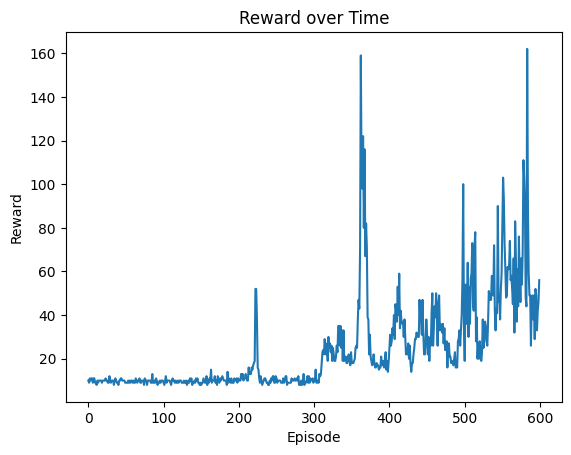

In [23]:
plot_rewards(training_loop(NUM_EPISODES))

Now that we have a baseline for our reinforcenet learning loop we can try training with our met network that will automatically shape our network.

In [24]:
def training_loop(episodes):
    total_reward_list = []
    epsilon = 0.1  # Exploration rate
    for episode in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            action = original_network.select_action(state, cartpole_network, device, epsilon, env)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            memory.push(state, action, (reward+ shaped_reward), next_state, done)
            state = next_state
            total_reward += reward

        original_network.optimize_model(cartpole_network, cartpole_target_network, memory, optimizer, device)

        if episode % TARGET_UPDATE == 0:
            cartpole_target_network.load_state_dict(cartpole_network.state_dict())
        
        if episode % 30 == 0:
            print(f"Episode {episode+1}/{episodes}, Total Reward: {total_reward}")
        total_reward_list.append(total_reward)
    return total_reward_list
    

IndentationError: expected an indented block after function definition on line 2 (2957932976.py, line 3)